# Introduction - Creation of Model
## Model Structure - CNN


### Why CNN?
- A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image.
- A digital image is a binary representation of visual data which contains a series of pixels arranged in a grid-like fashion. Such kind of data can be easily analysed using such a model structure.

### CNN Architecture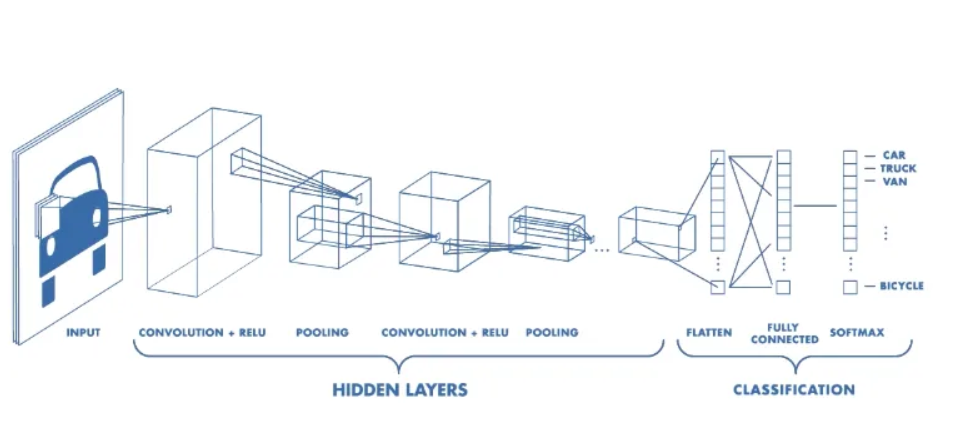

The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information. The output of the pooling layers is then passed through one or more fully connected layers, which are used to make a prediction or classify the image.

### STEP 1: Import the required modules

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

### STEP 2: Prepare source directories and data partitions

In [10]:
train_path = r'D:\INTEL\gesture\train'
test_path = r'D:\INTEL\gesture\test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=8,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=8, shuffle=True)

Found 3208 images belonging to 8 classes.
Found 808 images belonging to 8 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


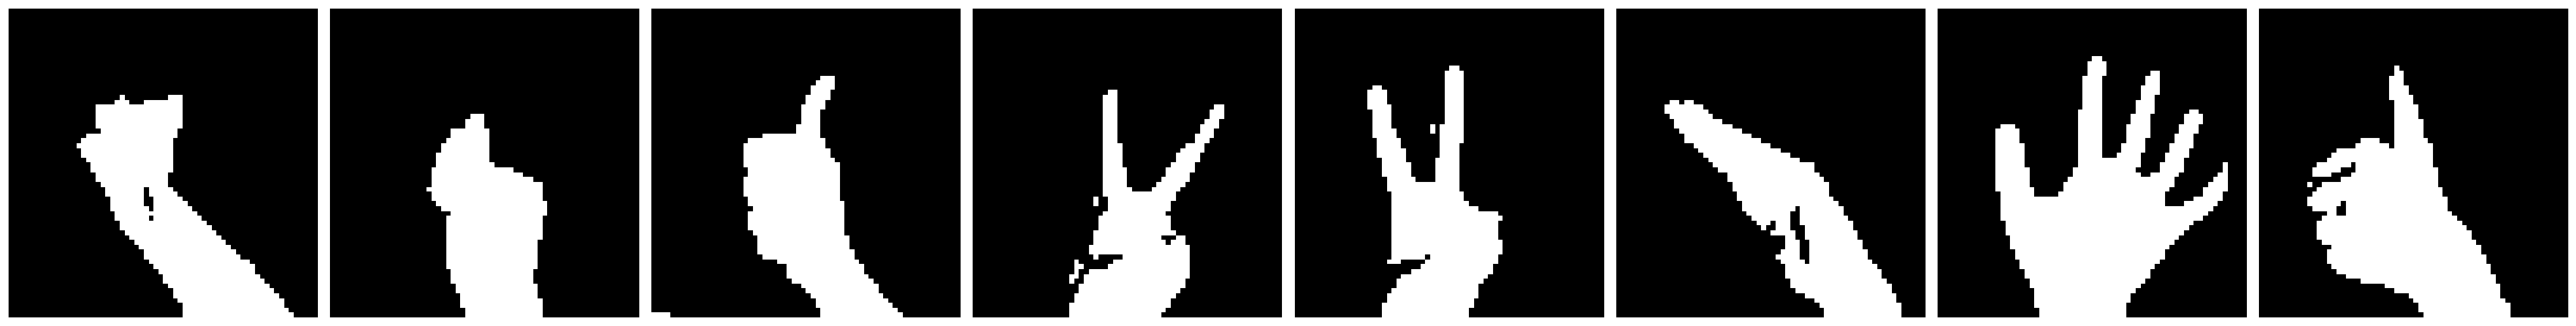

(8, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 8, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

### STEP 3: Define Model Structure

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(8,activation ="softmax"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 128)        

### Set up Loss Function, Optimizer

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

### STEP 4: Fit model on training data

In [19]:
history2 = model.fit(train_batches, epochs=8, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/8
401/401 [==============================] - 13s 30ms/step - loss: 0.7899 - accuracy: 0.8650 - val_loss: 1.5309 - val_accuracy: 0.6485 - lr: 0.0010
Epoch 2/8
401/401 [==============================] - 12s 30ms/step - loss: 0.0416 - accuracy: 0.9900 - val_loss: 1.3355 - val_accuracy: 0.6980 - lr: 0.0010
Epoch 3/8
401/401 [==============================] - 12s 30ms/step - loss: 0.0216 - accuracy: 0.9947 - val_loss: 1.4326 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 4/8
401/401 [==============================] - 13s 32ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 1.4145 - val_accuracy: 0.7252 - lr: 5.0000e-04


In [20]:
history2.history

{'loss': [0.7899417877197266,
  0.04162510111927986,
  0.021623807027935982,
  0.011407035402953625],
 'accuracy': [0.8650249242782593,
  0.9900249242782593,
  0.9947007298469543,
  0.9968827962875366],
 'val_loss': [1.5308703184127808,
  1.335529088973999,
  1.4325882196426392,
  1.4144519567489624],
 'val_accuracy': [0.6485148668289185,
  0.698019802570343,
  0.7054455280303955,
  0.7252475023269653],
 'lr': [0.001, 0.001, 0.001, 0.0005]}

### STEP 5: Save the trained model

In [22]:
# For getting next batch of testing imgs...
imgs, labels = next(test_batches)
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
# Once the model is fitted we save the model using model.save()  function.
model.save('asl_recog_kg_1.h5')

loss of 0.7549014091491699; accuracy of 87.5%


### Here, we can finally make predictions!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predictions on a small set of test data--

NO   Thumbs Up   I Love You   Walk   Thumbs Up   Hello   I Love You   Thumbs Up   

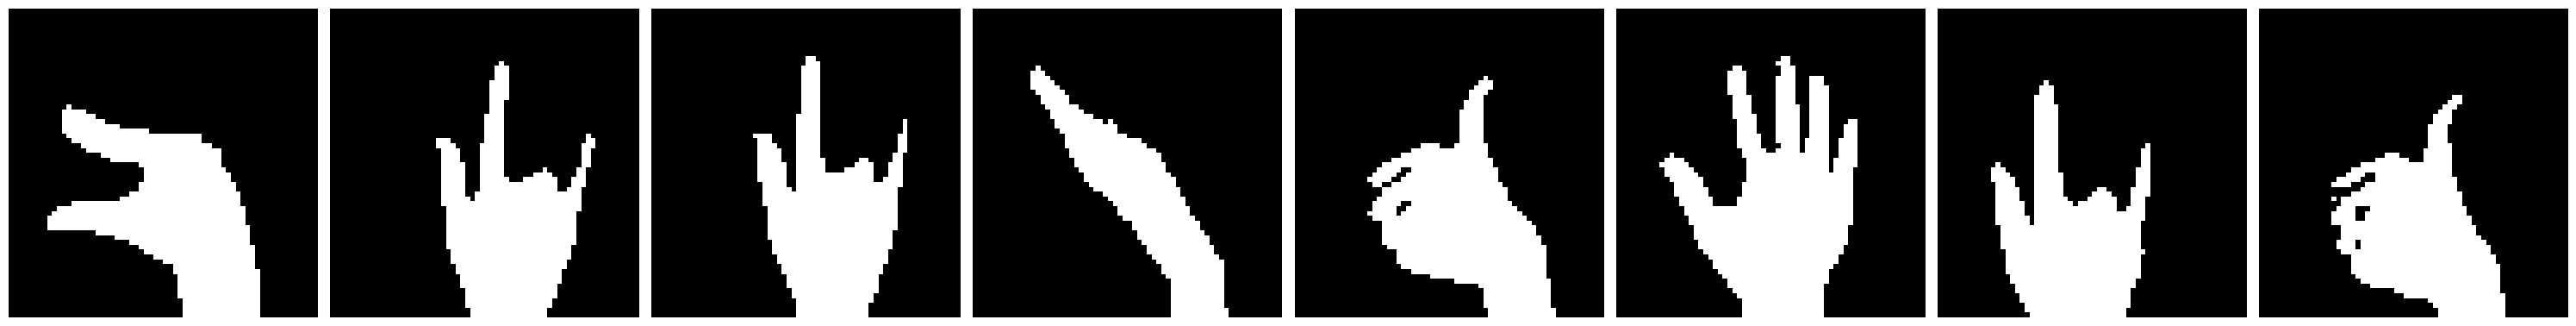

Actual labels
NO   I Love You   I Love You   Walk   Thumbs Up   Hello   I Love You   Thumbs Up   

In [26]:
word_dict = word_dict = {0:'Hello',1:'YES',2:'NO',3:'I Love You',4:'Walk',5:'Victory',6:'Thumbs Down',7:'Thumbs Up'}
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')